# Advanced Data Cleaning I


Our client is the successful video game publisher ‘Eric Games’. The company plans to create a new game targeting to be a blockbuster. <br> 
In this project we have to find which characteristics make a game successful in the game industry?


In the next few days of the course we will use the video game dataset __[from International Games DataBase (IGDB](https://www.igdb.com/discover)__) to answer this question.


Today we will answer the following questions:


1. What’s the first game ever released and when (not created)? <br>
2. Which are the top 5 games of all time? (tip: many games score 100 rating and have a few reviews, other games score a bit lower but much higher reviews...)<br>
3. Do game ratings vary from year to year?<br>
4. In which year the most games were released?<br>
5. In the last 5 years, which month were released the most games per year, can you guess why?<br>

In [56]:
# First we import our libraries
import pandas as pd
import numpy as np
# re library will help us to clean texts using regex
import re
# datatime library will help us to convert the date columns in correct data type
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Load the dataset
games = pd.read_csv('Datasets\igdb_dataset.csv', low_memory = False)

In [26]:
# let's see our dataset
games.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count
0,70.0,"""TerraNova:StrikeForceCentauri""",13,8.259840e+08,0.0,"5,13,15","1,18",1,70.0,2.0,"13200,16806,17130,24620,25311,34823,55038,6828...",81.0,3.0,"""https://www.igdb.com/games/terra-nova-strike-...",92.0,1.0
1,40104.0,"""DogouSouken""",52,5.364576e+08,0.0,5,NaN,NaN,NaN,NaN,"12364,27270,43367,103281,103292,103298,103301,...",NaN,NaN,"""https://www.igdb.com/games/dogou-souken""",NaN,NaN
2,51663.0,"""TheFiremen2:Pete&Danny""",NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""https://www.igdb.com/games/the-firemen-2-pete...",NaN,NaN
3,86911.0,"""Baccarat-BestCasinoBettingGame""",14,1.381968e+09,0.0,NaN,NaN,NaN,NaN,NaN,"59426,75894,86811,86969,86981,86987,87087,8909...",NaN,NaN,"""https://www.igdb.com/games/baccarat-best-casi...",NaN,NaN
4,68841.0,"""Captivus""",6,1.506989e+09,0.0,"15,16",18,NaN,NaN,NaN,"11666,13200,13660,16806,17130,24620,32510,3482...",NaN,NaN,"""https://www.igdb.com/games/captivus""",NaN,NaN


In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135063 entries, 0 to 135062
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       135062 non-null  float64
 1   name                     135061 non-null  object 
 2   platforms                75337 non-null   object 
 3   first_release_date       73294 non-null   float64
 4   category                 135062 non-null  float64
 5   genres                   92472 non-null   object 
 6   themes                   59622 non-null   object 
 7   player_perspectives      36100 non-null   object 
 8   rating                   31303 non-null   object 
 9   rating_count             31300 non-null   float64
 10  similar_games            99347 non-null   object 
 11  total_rating             31300 non-null   float64
 12  total_rating_count       31300 non-null   float64
 13  url                      135061 non-null  object 
 14  aggr

In [28]:
games.describe()

,id,first_release_date,category,rating_count,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count
count,135062.000000,7.329400e+04,135062.000000,31300.000000,31300.000000,31300.00000,13124.000000,13124.000000
mean,70664.254972,1.228842e+09,0.081777,13.901086,66.132921,15.26885,68.438922,3.680204
std,40694.453733,3.468703e+08,0.534446,75.022597,14.886746,76.43429,16.351182,4.136703
min,1.000000,-6.943968e+08,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35540.250000,9.851328e+08,0.000000,0.000000,57.500000,0.00000,60.000000,1.000000
50%,70690.500000,1.382659e+09,0.000000,1.000000,70.000000,1.00000,70.000000,2.000000
75%,105830.750000,1.499386e+09,0.000000,5.000000,77.500000,6.00000,80.000000,4.000000
max,141114.000000,1.735603e+09,7.000000,2783.000000,100.000000,2817.00000,100.000000,60.000000


# Preprocess the dataset

Notice that the **name column** and the **url column** contain **' " '** -double quotes- that remained from the downloading and the parsing of the dataset. We need to remove those double quotes

In [29]:
#we will use the re library for this
games['name'].replace(to_replace='^"',value='',inplace=True,regex=True)
games['name'].replace(to_replace='"$',value='',inplace=True,regex=True)

games['url'].replace(to_replace='^"',value='',inplace=True,regex=True)
games['url'].replace(to_replace='"$',value='',inplace=True,regex=True)
games.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count
0,70.0,TerraNova:StrikeForceCentauri,13,8.259840e+08,0.0,"5,13,15","1,18",1,70.0,2.0,"13200,16806,17130,24620,25311,34823,55038,6828...",81.0,3.0,https://www.igdb.com/games/terra-nova-strike-f...,92.0,1.0
1,40104.0,DogouSouken,52,5.364576e+08,0.0,5,NaN,NaN,NaN,NaN,"12364,27270,43367,103281,103292,103298,103301,...",NaN,NaN,https://www.igdb.com/games/dogou-souken,NaN,NaN
2,51663.0,TheFiremen2:Pete&Danny,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/the-firemen-2-pete-...,NaN,NaN
3,86911.0,Baccarat-BestCasinoBettingGame,14,1.381968e+09,0.0,NaN,NaN,NaN,NaN,NaN,"59426,75894,86811,86969,86981,86987,87087,8909...",NaN,NaN,https://www.igdb.com/games/baccarat-best-casin...,NaN,NaN
4,68841.0,Captivus,6,1.506989e+09,0.0,"15,16",18,NaN,NaN,NaN,"11666,13200,13660,16806,17130,24620,32510,3482...",NaN,NaN,https://www.igdb.com/games/captivus,NaN,NaN


## Removing the rows without date
For the next step we only want only games that have a date, so we will delete entries that don't have a date or have negative date

In [30]:
games.drop(games[games['first_release_date'] < 0].index, inplace=True)
games.dropna(subset=['first_release_date'])
games.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count
0,70.0,TerraNova:StrikeForceCentauri,13,8.259840e+08,0.0,"5,13,15","1,18",1,70.0,2.0,"13200,16806,17130,24620,25311,34823,55038,6828...",81.0,3.0,https://www.igdb.com/games/terra-nova-strike-f...,92.0,1.0
1,40104.0,DogouSouken,52,5.364576e+08,0.0,5,NaN,NaN,NaN,NaN,"12364,27270,43367,103281,103292,103298,103301,...",NaN,NaN,https://www.igdb.com/games/dogou-souken,NaN,NaN
2,51663.0,TheFiremen2:Pete&Danny,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/the-firemen-2-pete-...,NaN,NaN
3,86911.0,Baccarat-BestCasinoBettingGame,14,1.381968e+09,0.0,NaN,NaN,NaN,NaN,NaN,"59426,75894,86811,86969,86981,86987,87087,8909...",NaN,NaN,https://www.igdb.com/games/baccarat-best-casin...,NaN,NaN
4,68841.0,Captivus,6,1.506989e+09,0.0,"15,16",18,NaN,NaN,NaN,"11666,13200,13660,16806,17130,24620,32510,3482...",NaN,NaN,https://www.igdb.com/games/captivus,NaN,NaN


## Correcting datetime
Now we need to fix the column **first release date** and we will split this column in year and month for further analysis

In [32]:
# convert first_release_date to datetime
games['first_release_date'] = pd.to_datetime(games['first_release_date'], unit='s')
# Create the new columns for year and for the month
games['year'] = games['first_release_date'].dt.year
games['month'] = games['first_release_date'].dt.month
games.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month
0,70.0,TerraNova:StrikeForceCentauri,13,1996-03-05,0.0,"5,13,15","1,18",1,70.0,2.0,"13200,16806,17130,24620,25311,34823,55038,6828...",81.0,3.0,https://www.igdb.com/games/terra-nova-strike-f...,92.0,1.0,1996.0,3.0
1,40104.0,DogouSouken,52,1987-01-01,0.0,5,NaN,NaN,NaN,NaN,"12364,27270,43367,103281,103292,103298,103301,...",NaN,NaN,https://www.igdb.com/games/dogou-souken,NaN,NaN,1987.0,1.0
2,51663.0,TheFiremen2:Pete&Danny,NaN,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/the-firemen-2-pete-...,NaN,NaN,NaN,NaN
3,86911.0,Baccarat-BestCasinoBettingGame,14,2013-10-17,0.0,NaN,NaN,NaN,NaN,NaN,"59426,75894,86811,86969,86981,86987,87087,8909...",NaN,NaN,https://www.igdb.com/games/baccarat-best-casin...,NaN,NaN,2013.0,10.0
4,68841.0,Captivus,6,2017-10-03,0.0,"15,16",18,NaN,NaN,NaN,"11666,13200,13660,16806,17130,24620,32510,3482...",NaN,NaN,https://www.igdb.com/games/captivus,NaN,NaN,2017.0,10.0


## Correcting the rating column
As we can observe the column rating has Dtype object which is wrong, we need to convert it into numeric. We need this column to compare the ratings of the games.

In [34]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135052 entries, 0 to 135062
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       135051 non-null  float64       
 1   name                     135050 non-null  object        
 2   platforms                75326 non-null   object        
 3   first_release_date       73283 non-null   datetime64[ns]
 4   category                 135051 non-null  float64       
 5   genres                   92461 non-null   object        
 6   themes                   59614 non-null   object        
 7   player_perspectives      36097 non-null   object        
 8   rating                   31301 non-null   object        
 9   rating_count             31298 non-null   float64       
 10  similar_games            99336 non-null   object        
 11  total_rating             31298 non-null   float64       
 12  total_rating_cou

In [36]:
games['rating'] = pd.to_numeric(games['rating'], errors='coerce')
games.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month
0,70.0,TerraNova:StrikeForceCentauri,13,1996-03-05,0.0,"5,13,15","1,18",1,70.0,2.0,"13200,16806,17130,24620,25311,34823,55038,6828...",81.0,3.0,https://www.igdb.com/games/terra-nova-strike-f...,92.0,1.0,1996.0,3.0
1,40104.0,DogouSouken,52,1987-01-01,0.0,5,NaN,NaN,NaN,NaN,"12364,27270,43367,103281,103292,103298,103301,...",NaN,NaN,https://www.igdb.com/games/dogou-souken,NaN,NaN,1987.0,1.0
2,51663.0,TheFiremen2:Pete&Danny,NaN,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/the-firemen-2-pete-...,NaN,NaN,NaN,NaN
3,86911.0,Baccarat-BestCasinoBettingGame,14,2013-10-17,0.0,NaN,NaN,NaN,NaN,NaN,"59426,75894,86811,86969,86981,86987,87087,8909...",NaN,NaN,https://www.igdb.com/games/baccarat-best-casin...,NaN,NaN,2013.0,10.0
4,68841.0,Captivus,6,2017-10-03,0.0,"15,16",18,NaN,NaN,NaN,"11666,13200,13660,16806,17130,24620,32510,3482...",NaN,NaN,https://www.igdb.com/games/captivus,NaN,NaN,2017.0,10.0


# 1. What’s the first game ever released and when (not created)?

In [39]:
# for we can find the first game easy by sorting the first release date column
games.sort_values('first_release_date', inplace=True)
games.head(1)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month
82269,56115.0,JetRocket,52,1970-06-30,0.0,5,1,1,NaN,NaN,"8559,10964,11171,15536,28751,57217,58075,64311...",NaN,NaN,https://www.igdb.com/games/jet-rocket,NaN,NaN,1970.0,6.0


## 2. Which are the top 5 games of all time? (tip: many games score 100 rating and have a few reviews, other games score a bit lower but much higher reviews...)

For this question, we need to create a new column and normalize the rating to be able to compare them efficient

In [41]:
# First we need to clean the rating count and remove the rows with rating count = 0
games.drop(games[games["rating_count"] == 0].index, inplace=True)
games

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month
82269,56115.0,JetRocket,52,1970-06-30,0.0,5,1,1,NaN,NaN,"8559,10964,11171,15536,28751,57217,58075,64311...",NaN,NaN,https://www.igdb.com/games/jet-rocket,NaN,NaN,1970.0,6.0
90255,11304.0,Highnoon,"82,107",1970-12-31,0.0,NaN,1,5,NaN,NaN,"58867,100800,103301,105049,111130,112589,11389...",NaN,NaN,https://www.igdb.com/games/highnoon,NaN,NaN,1970.0,12.0
12078,11396.0,GalaxyGame,108,1971-09-01,0.0,5,18,3,NaN,NaN,"38030,55038,57187,68286,68287,78770,103281,105...",NaN,NaN,https://www.igdb.com/games/galaxy-game,NaN,NaN,1971.0,9.0
107254,11245.0,ComputerSpace,52,1971-11-01,0.0,"5,33",18,4,NaN,NaN,"17111,17130,55038,57187,68286,68287,78770,1052...",NaN,NaN,https://www.igdb.com/games/computer-space,NaN,NaN,1971.0,11.0
69032,11325.0,TheOregonTrail,"104,109",1971-12-03,0.0,"13,15,31","22,34",5,79.875319,18.0,"9789,20776,24765,29173,35371,36346,51945,55036...",79.875319,18.0,https://www.igdb.com/games/the-oregon-trail,NaN,NaN,1971.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135051,36795.0,SuperDoomed'nDamned,NaN,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/super-doomedn-damned,NaN,NaN,NaN,NaN
135052,114314.0,DestleStrike,NaN,NaT,0.0,32,1,NaN,NaN,NaN,"32902,37419,40524,43367,105233,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/destle-strike,NaN,NaN,NaN,NaN
135054,115593.0,NextStop3,NaN,NaT,0.0,"13,15",NaN,NaN,NaN,NaN,"17613,36258,51577,55888,65827,76340,79134,1127...",NaN,NaN,https://www.igdb.com/games/next-stop-3,NaN,NaN,NaN,NaN
135055,115038.0,\u5e7d\u94c3\u5170-lilyofthehollow-,NaN,NaT,0.0,32,NaN,NaN,NaN,NaN,"8367,74127,81275,102420,108778,111130,113895,1...",NaN,NaN,https://www.igdb.com/games/you-ling-lan-lily-o...,NaN,NaN,NaN,NaN


In [43]:
# We create a new column for weighted_score, the number of reviews play a significatnt role

games["weighted_score"] = games["rating"] * games["rating_count"]

# Then we create the normalized score
games["normalized_weighted_score"] = (games["weighted_score"] - games["weighted_score"].min()) \
                                                / (games["weighted_score"].max() - games["weighted_score"].min()) * 100

games.head(10)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
82269,56115.0,JetRocket,52,1970-06-30,0.0,5,1,1,NaN,NaN,"8559,10964,11171,15536,28751,57217,58075,64311...",NaN,NaN,https://www.igdb.com/games/jet-rocket,NaN,NaN,1970.0,6.0,NaN,NaN
90255,11304.0,Highnoon,"82,107",1970-12-31,0.0,NaN,1,5,NaN,NaN,"58867,100800,103301,105049,111130,112589,11389...",NaN,NaN,https://www.igdb.com/games/highnoon,NaN,NaN,1970.0,12.0,NaN,NaN
12078,11396.0,GalaxyGame,108,1971-09-01,0.0,5,18,3,NaN,NaN,"38030,55038,57187,68286,68287,78770,103281,105...",NaN,NaN,https://www.igdb.com/games/galaxy-game,NaN,NaN,1971.0,9.0,NaN,NaN
107254,11245.0,ComputerSpace,52,1971-11-01,0.0,"5,33",18,4,NaN,NaN,"17111,17130,55038,57187,68286,68287,78770,1052...",NaN,NaN,https://www.igdb.com/games/computer-space,NaN,NaN,1971.0,11.0,NaN,NaN
69032,11325.0,TheOregonTrail,"104,109",1971-12-03,0.0,"13,15,31","22,34",5,79.875319,18.0,"9789,20776,24765,29173,35371,36346,51945,55036...",79.875319,18.0,https://www.igdb.com/games/the-oregon-trail,NaN,NaN,1971.0,12.0,1437.755750,0.567672
12244,11497.0,Empire,"104,108",1971-12-31,0.0,"16,30","39,41",NaN,NaN,NaN,"634,902,26845,102057,106104,106805,117417,1191...",NaN,NaN,https://www.igdb.com/games/empire,NaN,NaN,1971.0,12.0,NaN,NaN
129649,11412.0,Baseball,96,1971-12-31,0.0,14,1,NaN,NaN,NaN,"15851,22690,96476,113149,113895,116353,118871,...",NaN,NaN,https://www.igdb.com/games/baseball--3,NaN,NaN,1971.0,12.0,NaN,NaN
24302,40401.0,PlayBall,52,1972-06-01,0.0,14,1,NaN,NaN,NaN,"15851,96476,113149,113895,116353,118871,120268...",NaN,NaN,https://www.igdb.com/games/play-ball,NaN,NaN,1972.0,6.0,NaN,NaN
113538,28363.0,ShootingGallery,88,1972-09-01,0.0,5,1,1,NaN,NaN,"19164,28751,43367,103292,103298,103301,105049,...",NaN,NaN,https://www.igdb.com/games/shooting-gallery--1,NaN,NaN,1972.0,9.0,NaN,NaN
120021,1333.0,Pong,"52,127,140,141",1972-11-29,0.0,"13,14,33",1,3,74.516621,55.0,"6763,15851,17548,30830,35371,37419,51945,11887...",74.516621,55.0,https://www.igdb.com/games/pong,NaN,NaN,1972.0,11.0,4098.414158,1.618184


In [44]:
# Now we need only to sort the column normalized weighted score
games.sort_values('normalized_weighted_score', ascending=False, inplace=True)
games.head(5)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
76901,1020.0,GrandTheftAutoV,"6,9,12,48,49",2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
89699,1942.0,TheWitcher3:WildHunt,"6,48,49",2015-05-19,0.0,"12,31","1,17,38",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
133848,72.0,Portal2,"3,6,9,12,14",2011-04-19,0.0,"5,8,9,31","1,18,27",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
68308,472.0,TheElderScrollsV:Skyrim,"6,9,12",2011-11-11,0.0,"12,31","1,17,33,38","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
132155,1009.0,TheLastofUs,9,2013-06-14,0.0,"5,31","1,19,21,23",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625


In [170]:
clean_games = clean_games[clean_games['total_rating'].notnull()]
clean_games = clean_games[clean_games['total_rating_count'].notnull()]

## 3. Do game ratings vary from year to year?

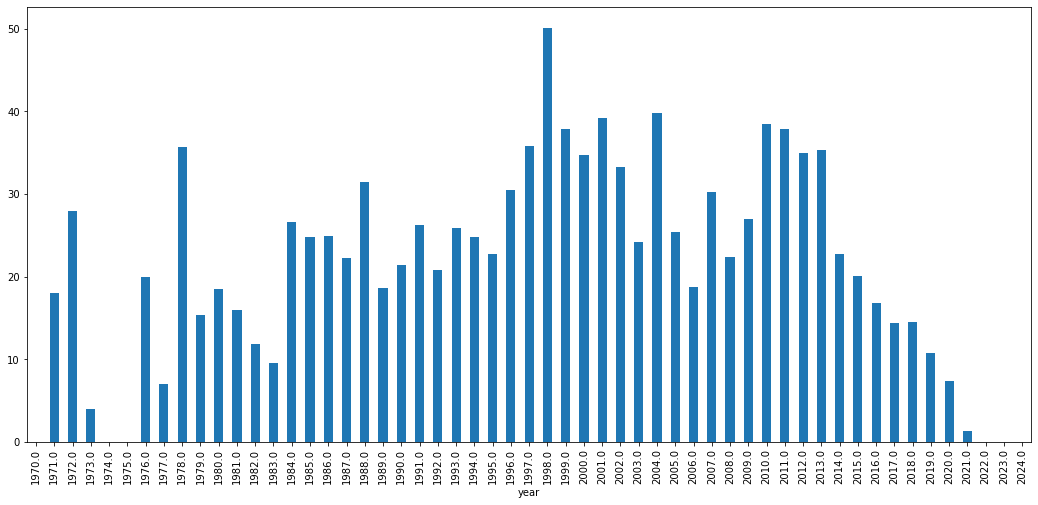

In [45]:
ratings = games.groupby(by='year')['rating_count'].mean()
ratings.plot.bar(figsize=(18,8))
None

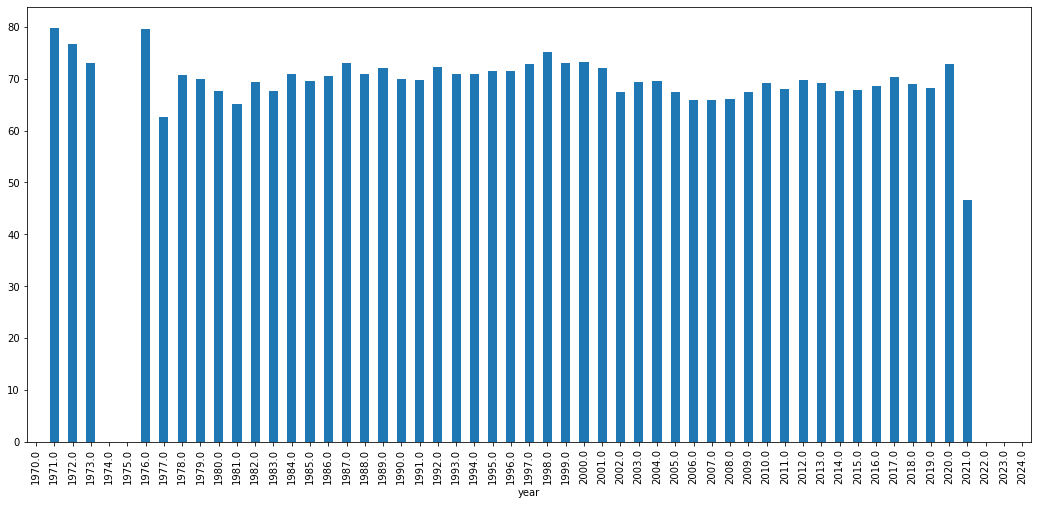

In [47]:
ratings = games.groupby(by='year')['rating'].mean()
ratings.plot.bar(figsize=(18,8))
None

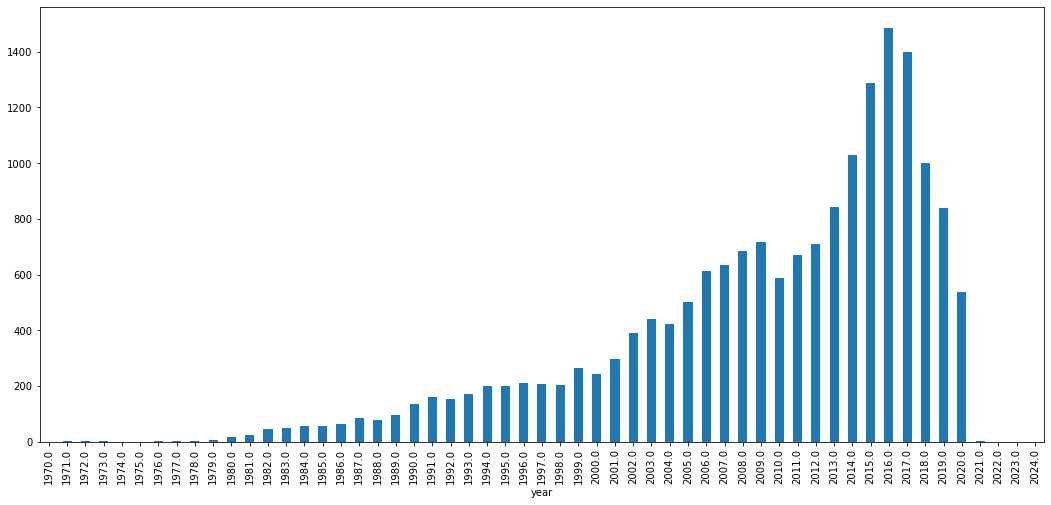

In [48]:
ratings = games.groupby(by='year')['normalized_weighted_score'].count()
ratings.plot.bar(figsize=(18,8))
None

### Insights
1. we can observe a positive trend over years which follow the adoption and the increasing size of the video game industry<br>
2. drop in 2009 one year after the global financial crisis<br>
3. the years 2021 and 2022 should be ignored because games in this year doesn't have the same period to increase fan base and popularity <br>
4. the year 2016 , and 2017 are outlier years because we had many blockbusters games also in 2017 we had the most games releases


## 4. In which year were released the most games?

In [50]:
# To answer this we can use the mode which will give us the most frequent number in column year
games['year'].mode()

0    2017.0
dtype: float64

# 5. In the last 5 years, which month were released the most games per year, can you guess why?

In [51]:
# we take the game titles from 2016 to 2020

games_five = games[(games['first_release_date'] >= datetime(2016, 1, 1)) & (games['first_release_date'] <= datetime(2020, 12, 31))]
games_five

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
133854,7331.0,Uncharted4:AThief'sEnd,48,2016-05-10,0.0,"5,31","1,17,22",2,92.424968,1248.0,"431,471,512,565,1009,5503,7323,11156,11186",92.795817,1273.0,https://www.igdb.com/games/uncharted-4-a-thief...,93.166667,25.0,2016.0,5.0,115346.360029,45.542396
134338,7346.0,TheLegendofZelda:BreathoftheWild,"41,130",2017-03-03,0.0,"12,31","1,17,38",2,92.156404,1191.0,"359,472,1029,1036,1864,1942,3025,11156,19560",94.874499,1222.0,https://www.igdb.com/games/the-legend-of-zelda...,97.592593,31.0,2017.0,3.0,109758.277678,43.336044
133085,19560.0,GodofWar,48,2018-04-20,0.0,"25,31","1,17,22",2,95.376476,1144.0,"19564,19565,22387,23733,25076,26192,28168,3692...",96.160460,1165.0,https://www.igdb.com/games/god-of-war--1,96.944444,21.0,2018.0,4.0,109110.688332,43.080355
133878,11156.0,HorizonZeroDawn,"6,48",2017-02-28,0.0,"5,12","1,18,38",2,91.690298,989.0,"1877,7349,11208,17379,19564,25076,25300,36198,...",90.268226,1018.0,https://www.igdb.com/games/horizon-zero-dawn,88.846154,29.0,2017.0,2.0,90681.704579,35.804009
81933,7351.0,DOOM,"6,48,49",2016-05-13,0.0,5,"1,18,19,21",1,86.189907,1026.0,"312,533,571,1006,2031,9498,9727,11118,19531",86.579328,1060.0,https://www.igdb.com/games/doom--2,86.968750,34.0,2016.0,5.0,88430.844465,34.915298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23921,116490.0,ShipBuilderSimulator,6,2020-12-31,0.0,13,NaN,NaN,NaN,NaN,"36258,79134,87485,101573,105264,106008,112754,...",NaN,NaN,https://www.igdb.com/games/ship-builder-simulator,NaN,NaN,2020.0,12.0,NaN,NaN
134553,81680.0,Mr.Prepper,6,2020-12-31,0.0,"12,13,31,32",1,4,NaN,NaN,"25311,35994,37419,80916,96217,105011,105269,10...",NaN,NaN,https://www.igdb.com/games/mr-prepper,NaN,NaN,2020.0,12.0,NaN,NaN
129795,104238.0,Redout:SpaceAssault,6,2020-12-31,0.0,"5,13,31,32","1,18",2,NaN,NaN,"25311,37419,76263,81680,105011,105049,105269,1...",NaN,NaN,https://www.igdb.com/games/redout-space-assault,NaN,NaN,2020.0,12.0,NaN,NaN
59639,134813.0,Icarus,6,2020-12-31,0.0,NaN,21,NaN,NaN,NaN,"485,22513,26145,89562,103328,109550,115835,120...",NaN,NaN,https://www.igdb.com/games/icarus--1,NaN,NaN,2020.0,12.0,NaN,NaN


In [52]:
df_year_month = games_five.groupby(['year', 'month'])['id'].count()
df_year_month

year    month
2016.0  1.0      226
        2.0      244
        3.0      329
        4.0      321
        5.0      278
        6.0      318
        7.0      349
        8.0      389
        9.0      457
        10.0     500
        11.0     432
        12.0     608
2017.0  1.0      368
        2.0      384
        3.0      481
        4.0      424
        5.0      428
        6.0      432
        7.0      593
        8.0      666
        9.0      725
        10.0     706
        11.0     680
        12.0     684
2018.0  1.0      215
        2.0      253
        3.0      311
        4.0      225
        5.0      268
        6.0      234
        7.0      214
        8.0      268
        9.0      286
        10.0     270
        11.0     252
        12.0     647
2019.0  1.0      240
        2.0      245
        3.0      241
        4.0      268
        5.0      254
        6.0      229
        7.0      243
        8.0      272
        9.0      268
        10.0     280
        11.0     351

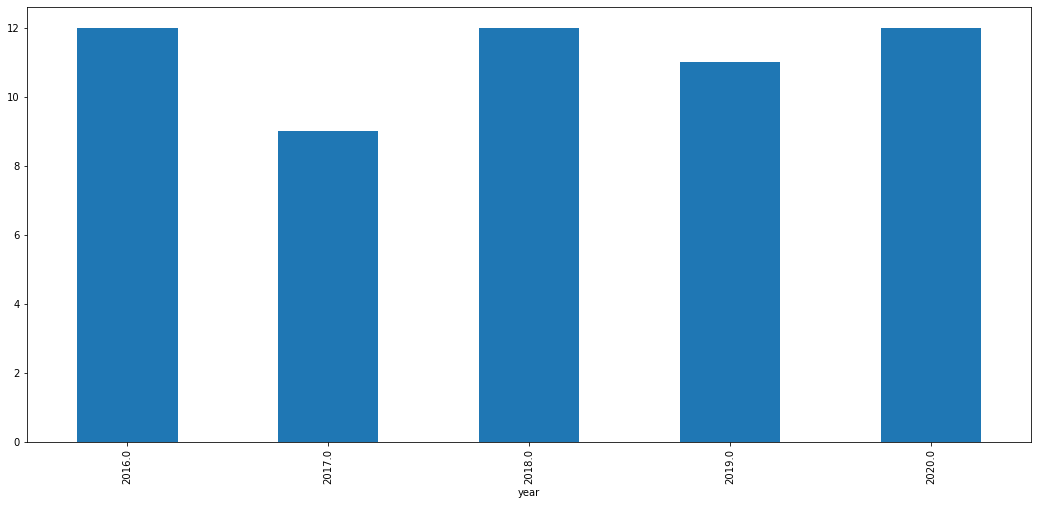

In [53]:
df_year_month.unstack().idxmax(axis=1).plot.bar(figsize=[18,8])
None

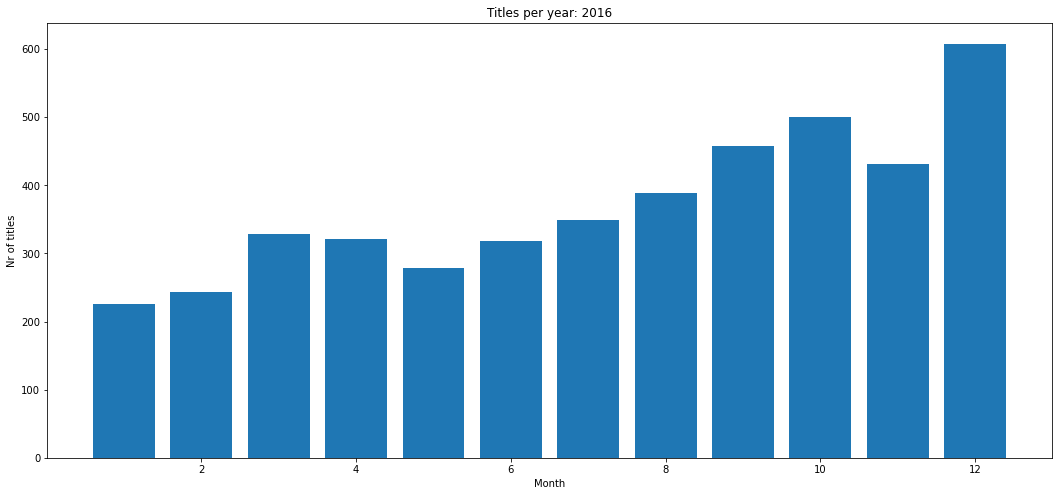

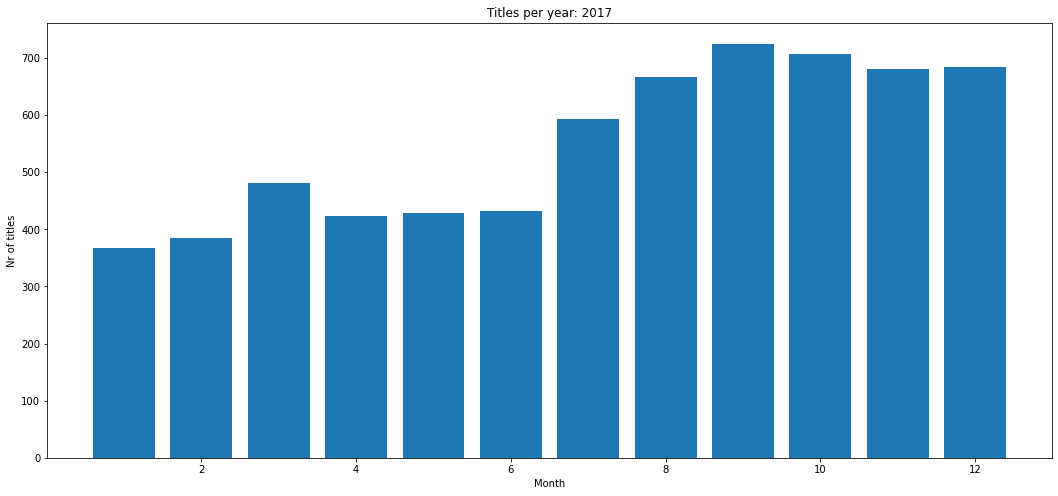

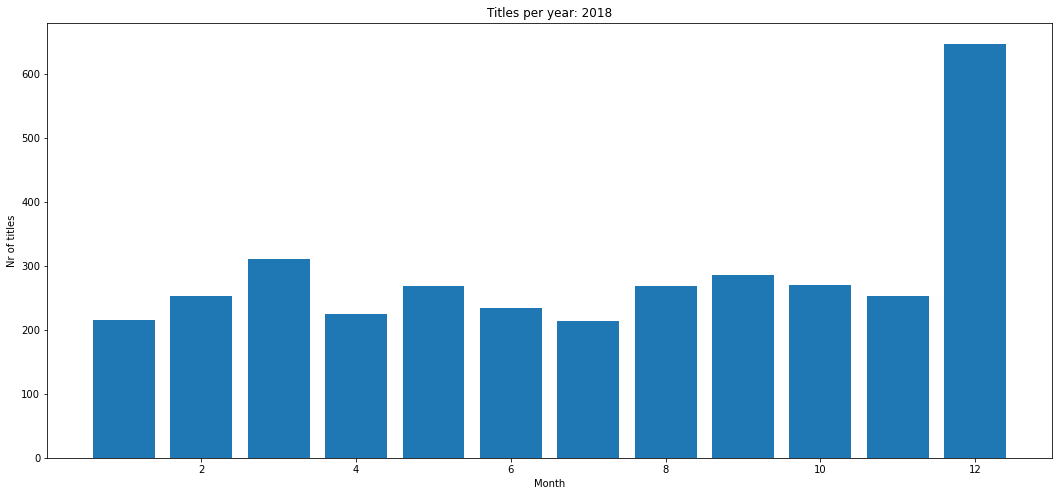

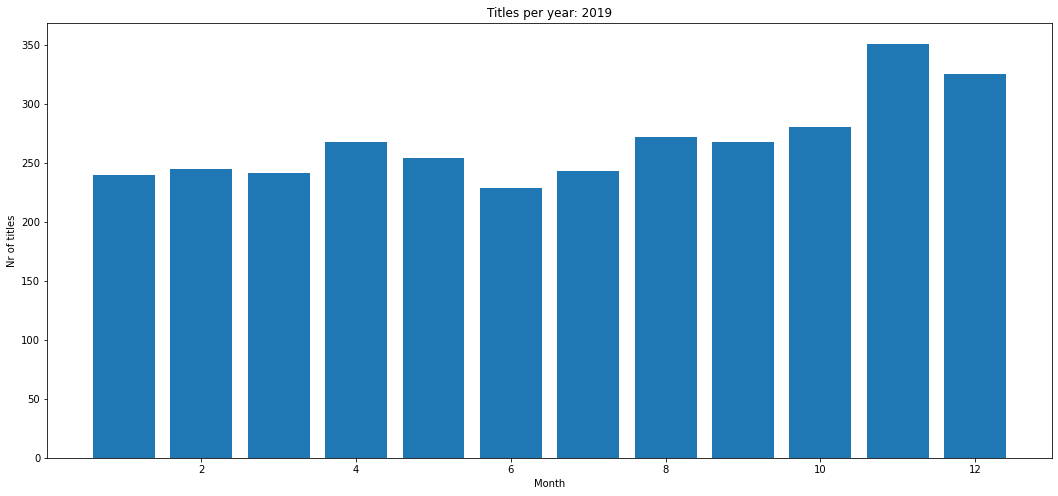

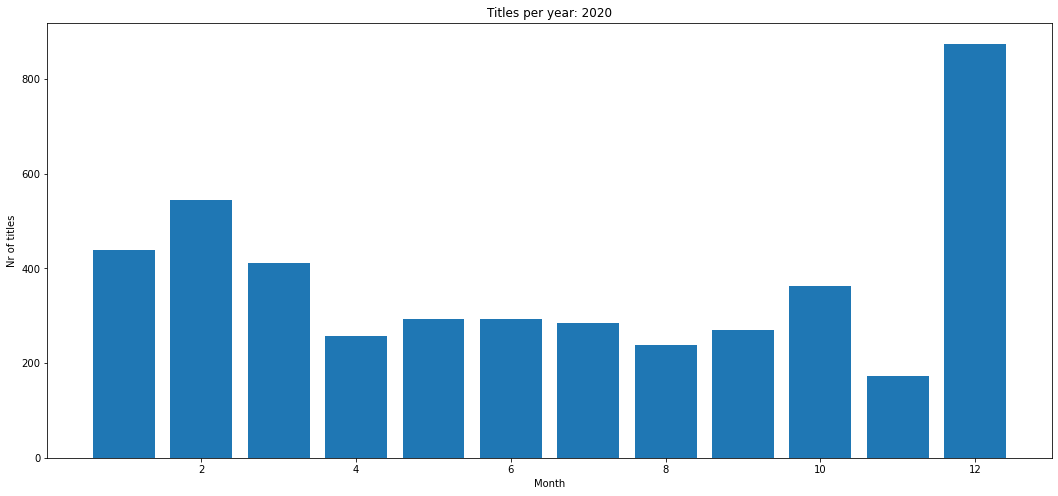

In [58]:
df_releases = games_five.groupby(['year', 'month'])['id'].agg('count').reset_index()
years = [2016, 2017, 2018, 2019, 2020]
# with this loop we will create 4 graphs 1 per year with the game titles per month
for year in years:
    x = df_releases[df_releases['year'] == year]
    plt.figure(figsize=(18,8))
    plt.title('Titles per year: {}'.format(year))
    plt.xlabel('Month')
    plt.ylabel('Nr of titles')
    plt.bar(x['month'],x['id'])
    None

### Insights
1. We can observe the q4 has the most releases this time of the year we have Christmas, consumers are willing to spend more for games as gifts
2. We can observe that q2 has the fewer releases because is summer time and in summer time consumers spend less time in the house